# Data Preparation and Regression Analysis: Handling Missing Values and Creating DataFrames for Linear and Multiple Regression


## Introduction
This analysis focuses on handling missing data and preparing the dataset for both linear and multiple regression analysis. The dataset contains various features, including an "Address" column with missing values. For effective modeling:

1. **Linear Regression**: We aim to preserve all available data in other features, ensuring no valid data is overlooked.
2. **Multiple Regression**: Missing values in the "Address" column are removed to create a refined dataset for comprehensive analysis.

Two dataframes are created:  
- **`df`**: For linear regression, retaining all rows with valid data in specific features.  
- **`df2`**: For multiple regression, focusing only on complete rows without missing "Address" values.  

This approach ensures the most accurate and efficient use of data for each regression type.
 


In [413]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("housePrice.csv")

In [414]:
print(df.dtypes)


Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [415]:
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

In [416]:
# Remove commas from the 'Area' column
df['Area'] = df['Area'].str.replace(',', '')

# Convert 'Area' column to int64
df['Area'] = df['Area'].astype('int64')

In [417]:
# Check if any column contains NaN values
nan_columns = df.columns[df.isna().any()].tolist()

# Print columns with NaN values
if nan_columns:
    print("Columns with NaN values:", nan_columns)
else:
    print("No columns contain NaN values")

Columns with NaN values: ['Address']


In [418]:
# Display count of values in 'Area' column
print("Count of values in 'Area' column:", df['Area'].count())

# Show values that are greater than 2000
print("Values in 'Area' column greater than 2000:")
print(df[df['Area'] >= 2000]['Area'])

Count of values in 'Area' column: 3479
Values in 'Area' column greater than 2000:
570      3310000000
709     16160000000
1604     8400000000
2171           3600
2802     2550000000
Name: Area, dtype: int64


In [419]:
print(df.dtypes)


Area            int64
Room            int64
Parking         int32
Warehouse       int32
Elevator        int32
Address        object
Price         float64
Price(USD)    float64
dtype: object


### Handling Missing Values

To ensure the dataset is suitable for regression analysis:

1. **Removed NaN values from the `Address` column**:
   - Created a new DataFrame `df2` for multiple regression analysis, containing only rows with complete data across all features.

2. **Why Two DataFrames (`df` and `df2`) Are Used**:
   - **`df`**: Retains the original data, including rows with missing `Address` values, for use in simple linear regression. This ensures no data is overlooked when analyzing features like `Area`.
   - **`df2`**: A cleaned version of the dataset (without missing values) used specifically for multiple regression, where all features must have complete data.

This approach balances preserving as much information as possible for simple regression while maintaining data integrity for multiple regression analysis.

In [421]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Address' column in df2
df2.dropna(subset=['Address'], inplace=True)
df2['Address'] = label_encoder.fit_transform(df2['Address'])


In [422]:
df.shape[0]

3479

In [423]:
df2.shape[0]

3456

In [424]:
# Check the unique values encoded for the 'Address' column
print("Encoded unique values for 'Address' column:", df2['Address'].unique())

Encoded unique values for 'Address' column: [156 117 152 150 106  13 183 100 135 188  71 120 154  99 179  12 163 141
 190  52 181 147  61 128   1 111  50 115 122 125  14 113 127  26  40 114
 142  21 157 108  35 164 134 184   4  93  39 138  27  23  74  88 158  51
  81  76 124 110  19  22 119  24  69  45  62 146 118  29  57  77  60  68
  65  36  31 132 189 126 105 176 123  10  43  42   2  63  89 112 166   0
  85  67 116  87  91 162  78 160  79 107  41  86   6 161  84  18 191  11
  37  44  97 131  75  90 145 185  96 101 172  28  49  48 155   7 170 102
 187 109 180  64 104  56 167  20 148  15 174  92 149  34 177 169  32  47
  17 137 136 151 182   5 140 121  46  72 129  54  59  94 165   3  38  70
 168  80 133 130  58 171  98  55  16 143 153 139  82  66  30  83  25  95
 178 159 173  33   9   8  53 175 144 103  73 186]


In [425]:
df2 = df2[df2['Area'] < 2000]
df = df[df['Area'] < 2000]

In [426]:
cdf2 = df2[['Area','Room','Parking','Warehouse', 'Elevator','Address', 'Price', 'Price(USD)']]
cdf2.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33
5,70,2,1,1,0,106,2.050000e+09,68333.33
6,87,2,1,1,1,117,6.000000e+08,20000.00
7,59,1,1,1,1,156,2.150000e+09,71666.67
8,54,2,1,1,0,13,4.930000e+08,16433.33


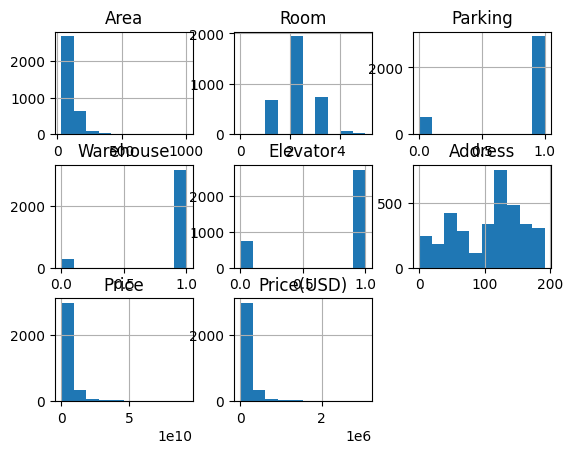

In [427]:
viz = cdf2[['Area','Room','Parking','Warehouse', 'Elevator','Address', 'Price', 'Price(USD)']]
viz.hist()
plt.show()

In [428]:
cdf = df[['Area','Room','Parking','Warehouse', 'Elevator', 'Price', 'Price(USD)']]
cdf.head(9)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,1,1,1,1.850000e+09,61666.67
1,60,1,1,1,1,1.850000e+09,61666.67
2,79,2,1,1,1,5.500000e+08,18333.33
3,95,2,1,1,1,9.025000e+08,30083.33
4,123,2,1,1,1,7.000000e+09,233333.33
5,70,2,1,1,0,2.050000e+09,68333.33
6,87,2,1,1,1,6.000000e+08,20000.00
7,59,1,1,1,1,2.150000e+09,71666.67
8,54,2,1,1,0,4.930000e+08,16433.33


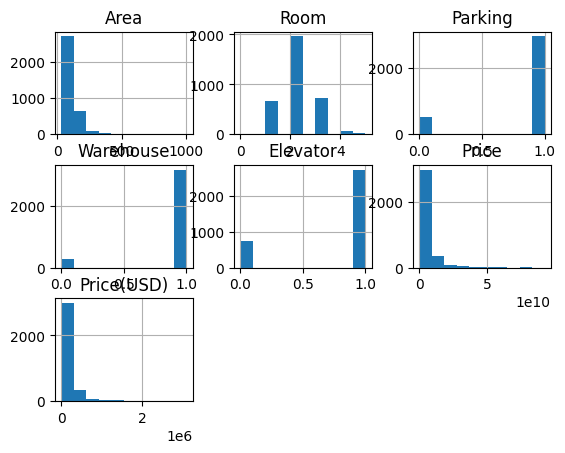

In [429]:
viz = cdf[['Area','Room','Parking','Warehouse', 'Elevator', 'Price', 'Price(USD)']]
viz.hist()
plt.show()

In [430]:
# Features and target variables
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']
target_variables = ['Price', 'Price(USD)']

# Calculate the correlation matrix
correlation_matrix = cdf2.corr()

# Extract correlations of features with target variables
feature_target_correlation = correlation_matrix.loc[features, target_variables]

# Print the correlation matrix
print("Correlation between features and target variables:")
print(feature_target_correlation)

Correlation between features and target variables:
              Price  Price(USD)
Area       0.706661    0.706661
Room       0.567862    0.567862
Parking    0.191240    0.191240
Warehouse  0.109691    0.109691
Elevator   0.111573    0.111573
Address   -0.075962   -0.075962


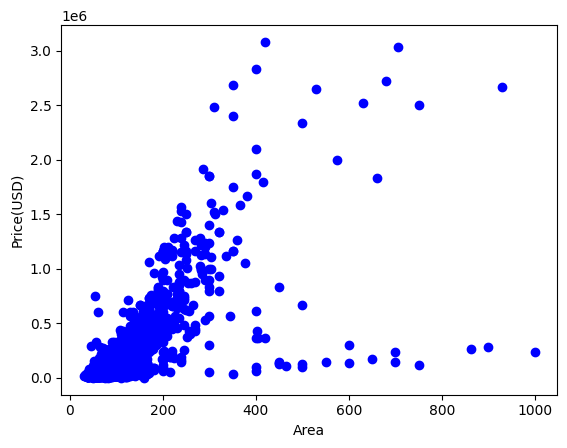

In [431]:
plt.scatter(cdf['Area'], cdf['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

# Simple Regression Model

In [432]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

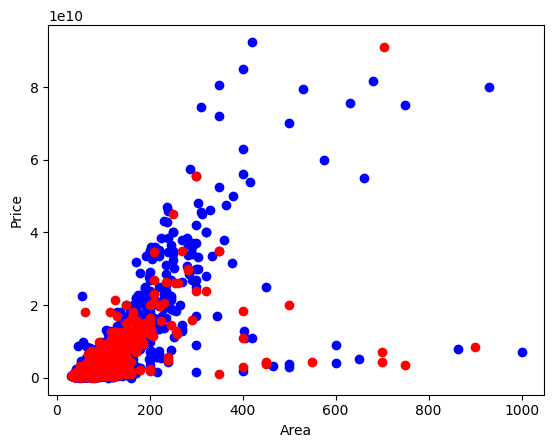

In [433]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(train.Area, train.Price,  color='blue')
ax1.scatter(test.Area, test.Price,  color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [434]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[92566676.36694883]]
Intercept:  [-4.36467885e+09]


Text(0, 0.5, 'Price')

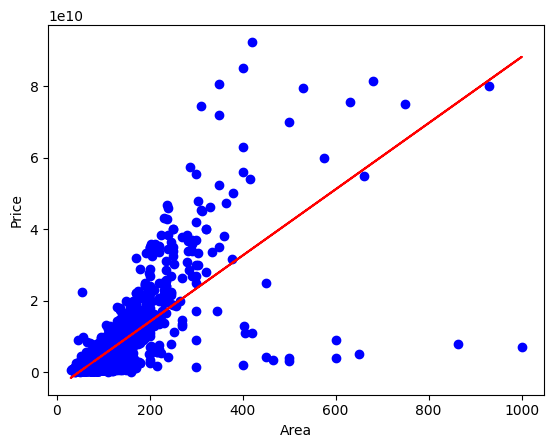

In [435]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price")

## Prediction Price(Toman)-Linear Regression with 'Area' as it seems to have higher Correlation

In [436]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2884975685.37
Residual sum of squares (MSE): 45123101168928268288.00
R2-score: -0.01


# Multiple Linear Regression

In [437]:
msk2 = np.random.rand(len(df2)) < 0.8
train2 = cdf2[msk2]
test2 = cdf2[~msk2]

### Price (USD) Prediction

In [438]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train2[['Area','Room','Parking','Warehouse', 'Elevator','Address']])
y = np.asanyarray(train2[['Price(USD)']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 2.25326270e+03  6.28976972e+04 -3.86031528e+03  3.78764138e+04
   2.97329145e+04  4.67509615e+01]]


In [439]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train2[['Area','Room','Parking']])
y = np.asanyarray(train2[['Price(USD)']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test2[['Area','Room','Parking']])
x = np.asanyarray(test2[['Area','Room','Parking']])
y = np.asanyarray(test2[['Price(USD)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 2224.52197267 65555.23193227 23426.37948681]]
Residual sum of squares: 35162473111.23
Variance score: 0.48


D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Price (Toman) Prediction

In [412]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train2[['Area','Room','Parking','Warehouse', 'Elevator','Address']])
y = np.asanyarray(train2[['Price']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)
regr = linear_model.LinearRegression()
x = np.asanyarray(train2[['Area','Room','Parking']])
y = np.asanyarray(train2[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test2[['Area','Room','Parking']])
x = np.asanyarray(test2[['Area','Room','Parking']])
y = np.asanyarray(test2[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 6.69839951e+07  1.82701751e+09 -2.35200372e+08  1.34417069e+09
   1.24912137e+09  2.86239553e+06]]
Coefficients:  [[6.53702058e+07 1.95928495e+09 8.21776372e+08]]
Residual sum of squares: 33009625835787005952.00
Variance score: 0.50


D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
